# To do's:
* Laura move example here and delete previous files
* Siren adjust release locations
* Siren: fancy cumulative dist
* laura simple total and cum dist

10 days!

In [9]:
!ncdump -h /storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210109_R20210110.nc


netcdf SMOC_20210109_R20210110 {
dimensions:
	longitude = 4320 ;
	latitude = 2041 ;
	depth = 1 ;
	time = UNLIMITED ; // (24 currently)
variables:
	float longitude(longitude) ;
		longitude:valid_min = -180.f ;
		longitude:long_name = "longitude coordinate" ;
		longitude:standard_name = "longitude" ;
		longitude:units = "degrees_east" ;
		longitude:step = 0.08332825 ;
	float latitude(latitude) ;
		latitude:valid_max = 90.f ;
		latitude:valid_min = -80.f ;
		latitude:long_name = "latitude coordinate" ;
		latitude:standard_name = "latitude" ;
		latitude:units = "degrees_north" ;
		latitude:step = 0.08332825 ;
	float depth(depth) ;
		depth:valid_min = 0.494025f ;
		depth:valid_max = 0.494025f ;
		depth:long_name = "Depth" ;
		depth:standard_name = "depth" ;
		depth:units = "m" ;
		depth:positive = "down" ;
	float time(time) ;
		time:units = "hours since 1950-01-01 0:0:0" ;
		time:calendar = "standard" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
		time:step = 1LL ;
	float u

In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset('/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210109_R20210110.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 1, time: 24)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494
  * time       (time) datetime64[ns] 2021-01-09T00:30:00 ... 2021-01-09T23:30:00
Data variables:
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    vsdx       (time, depth, latitude, longitude) float32 ...
    vsdy       (time, depth, latitude, longitude) float32 ...
    utide      (time, depth, latitude, longitude) float32 ...
    vtide      (time, depth, latitude, longitude) float32 ...
    utotal     (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_PHY_001_024
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         hourly mean merged surface currents from o...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    institution:                   MERCATOR OCEAN
    julian_day_unit:               hours since 1950-01-01 00:00:00
    latitude_min:                  -80
    latitude_max:                  90.0
    longitude_min:                 -180.0
    longitude_max:                 179.91667175293

In [16]:
ds.depth

<xarray.DataArray 'depth' (depth: 1)>
array([0.494025], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494
Attributes:
    valid_min:      0.494025
    valid_max:      0.494025
    long_name:      Depth
    standard_name:  depth
    units:          m
    positive:       down

In [10]:
ds.time

<xarray.DataArray 'time' (time: 24)>
array(['2021-01-09T00:30:00.000000000', '2021-01-09T01:30:00.000000000',
       '2021-01-09T02:30:00.000000000', '2021-01-09T03:30:00.000000000',
       '2021-01-09T04:30:00.000000000', '2021-01-09T05:30:00.000000000',
       '2021-01-09T06:30:00.000000000', '2021-01-09T07:30:00.000000000',
       '2021-01-09T08:30:00.000000000', '2021-01-09T09:30:00.000000000',
       '2021-01-09T10:30:00.000000000', '2021-01-09T11:30:00.000000000',
       '2021-01-09T12:30:00.000000000', '2021-01-09T13:30:00.000000000',
       '2021-01-09T14:30:00.000000000', '2021-01-09T15:30:00.000000000',
       '2021-01-09T16:30:00.000000000', '2021-01-09T17:30:00.000000000',
       '2021-01-09T18:30:00.000000000', '2021-01-09T19:30:00.000000000',
       '2021-01-09T20:30:00.000000000', '2021-01-09T21:30:00.000000000',
       '2021-01-09T22:30:00.000000000', '2021-01-09T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-09T00:30:00 ... 2021-01-09T23:30:00
Attributes:
    long_name:      time
    standard_name:  time
    step:           1

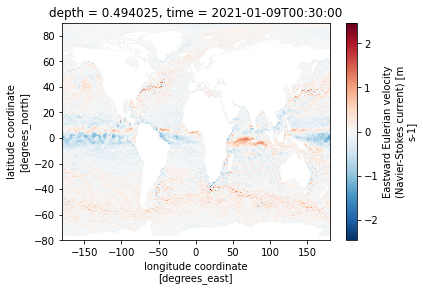

In [6]:
ds.uo[0,0,:,:].plot()

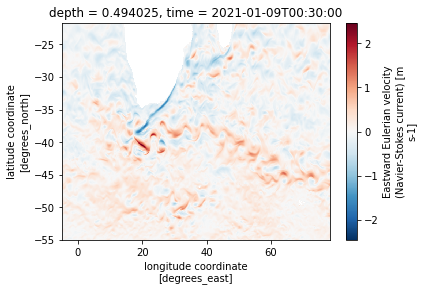

In [7]:
ds.uo[0,0,300:700,2100:3100].plot()

In [8]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter

In [12]:
# Lorenz directory
filedir = '/storage/shared/oceanparcels/input_data/CMEMS/'


In [13]:
filenames = {'U': filedir + "GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_202101[0-1]*",
             'V': filedir + "GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_202101[0-1]*"}

In [14]:
variables = {'U': 'uo',
             'V': 'vo'}
dimensions = {'lat': 'latitude',
              'lon': 'longitude',
              'time': 'time'}

In [15]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

# Releasing 1 particle per fieldset grid point


In [24]:
print(fieldset.U.lat[510:530])

print(fieldset.U.lon[2450:2470])


[-37.5      -37.416668 -37.333332 -37.25     -37.166668 -37.083332
 -37.       -36.916668 -36.833332 -36.75     -36.666668 -36.583332
 -36.5      -36.416668 -36.333332 -36.25     -36.166668 -36.083332
 -36.       -35.916668]
[24.166666 24.25     24.333334 24.416666 24.5      24.583334 24.666666
 24.75     24.833334 24.916666 25.       25.083334 25.166666 25.25
 25.333334 25.416666 25.5      25.583334 25.666666 25.75    ]


In [25]:
lon1D = fieldset.U.lon[2450:2470]
lat1D = fieldset.U.lat[510:530]

lons, lats = np.meshgrid(lon1D, lat1D) 
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lons, lat=lats)



In [26]:
def DeleteParticle(particle, fieldset, time):
    particle.delete

In [27]:
output_file = pset.ParticleFile(name="test_01.nc", outputdt=timedelta(hours=6))
pset.execute(AdvectionRK4,
             runtime=timedelta(days=2),
             dt=timedelta(minutes=25),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=output_file)

sh: None: command not found
INFO: Compiled ArrayJITParticleAdvectionRK4 ==> /tmp/parcels-319202/liba57f22e4ac07ce063a2d8e1ae7f85e7a_0.so
INFO: Temporary output files are stored in out-DPKOIBVO.
INFO: You can use "parcels_convert_npydir_to_netcdf out-DPKOIBVO" to convert these to a NetCDF file during the run.
100% (172800.0 of 172800.0) |############| Elapsed Time: 0:00:22 Time:  0:00:22


In [ ]:
output_file.export()


In [30]:
plotTrajectoriesFile('test_01.nc',
                     tracerfile=filedir + "GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210101_R20210102.nc",
                     tracerlon='longitude',
                     tracerlat='latitude',
                     tracerfield='uo');

AssertionError: Field uo expecting a data shape of [tdim, ydim, xdim]. Flag transpose=True could help to reorder the data.

In [29]:
!ls /storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_202101[0-1]*

/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210101_R20210102.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210102_R20210103.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210103_R20210104.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210104_R20210105.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210105_R20210106.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210106_R20210107.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210107_R20210108.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024_SMOC/SMOC_20210108_R20210109.nc
/storage/shared/oceanparcels/input_data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_0

In [31]:
import xarray as xr

In [32]:
ds = xr.open_dataset('test_01.nc')

In [33]:
import matplotlib.pyplot as plt 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
import matplotlib.ticker as mticker


/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/apps/miniconda3/envs/parcels-dev/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


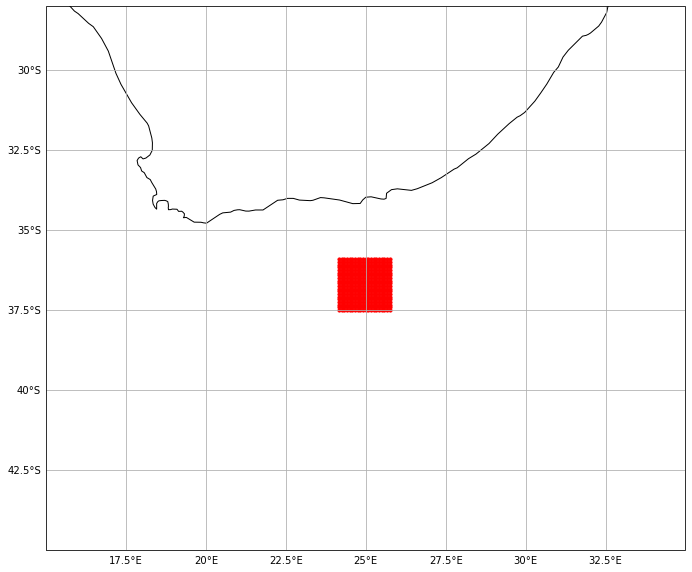

In [34]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(ds['lon'][:,0], ds['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([15, 35])
ax1.set_ylim([-45, -28])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
# gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# ax1.set_title('0m', size=12)
# ax1.legend(loc=2)